In [167]:
# Visualizes the location visit durations across different demographic (e.g., emplotyment) and mental health (e.g. depression)
# groups


import pickle
import os
import numpy as np
import pandas as pd

ft_dir = 'features_long/'

# list feature files
files = os.listdir(ft_dir)
# files = [files[0]]

# reading top locations
with open('top_locations.dat') as f:
    location_top = pickle.load(f)
f.close()

# reading assessments
with open('../Assessment/assessment.dat') as f:
    data = pickle.load(f)
f.close()

# adding durations to the dataframe
for loc_top in location_top:
    data.insert(loc=len(data.columns), column=loc_top, value=np.nan)

for filename in files:
    with open(ft_dir+filename) as f:  
        feature, target = pickle.load(f)

        ind_subject = np.where(data['ID']==filename[:-4])[0][0]
        
        data.loc[ind_subject, location_top] = 0
        dur_all = 0
        for (i,loc) in enumerate(target['location']):
            if not np.isnan(feature['duration'][i]):
                if loc in location_top:
                    data.loc[ind_subject, loc] += feature['duration'][i]
                dur_all += feature['duration'][i]
        
        # normalize
        data.loc[ind_subject, location_top] /= dur_all
        
    f.close()

In [168]:
data

,ID,PHQ9 W0,GAD7 W0,SPIN W0,PHQ9 W3,GAD7 W3,SPIN W3,PHQ9 W6,GAD7 W6,SPIN W6,...,Shop or Store,Work,"Food (Restaurant, Cafe)",Another's Home,Professional or Medical Office,Outdoors & Recreation,"Arts & Entertainment (Theater, Music Venue, Etc.)","Travel or Transport (Airport, Bus Stop, Train Station, Etc.)","Spiritual (Church, Temple, Etc.)","Nightlife Spot (Bar, Club)"
0,25349,6,10,22,3,5,31,1,2,37,...,0.005306,0.191130,0.034939,0.029910,0.002420,0.000000,0.000000,0.000000,0.000000,0.000000
1,38880,5,13,15,6,14,15,4,6,20,...,0.093068,0.146521,0.001050,0.123551,0.000768,0.000000,0.000000,0.173644,0.018495,0.000000
2,39468,12,11,28,13,15,26,9,8,30,...,0.020921,0.143004,0.034193,0.145453,0.008109,0.003052,0.019943,0.014738,0.001722,0.000342
3,62977,2,1,20,3,0,27,2,1,15,...,0.006667,0.000000,0.003384,0.002303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,97397,20,9,25,15,5,28,19,10,25,...,0.003585,0.417495,0.025391,0.016424,0.003074,0.024944,0.000000,0.025447,0.000249,0.000000
5,98384,15,4,12,16,4,15,14,9,18,...,0.011595,0.124868,0.015390,0.253672,0.000000,0.000000,0.000000,0.000641,0.001714,0.000000
6,106743,1,1,9,4,1,3,2,1,2,...,0.129956,0.223538,0.037004,0.058215,0.000000,0.000000,0.017216,0.000000,0.000000,0.000000
7,345921,2,18,5,8,10,8,8,9,3,...,0.004762,0.219124,0.024673,0.010667,0.000560,0.000000,0.011691,0.000000,0.000000,0.000000
8,391378,13,7,45,15,6,48,15,9,51,...,0.000853,0.148978,0.000000,0.004323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,411896,10,10,11,16,16,9,15,16,15,...,0.011071,0.000000,0.011802,0.003045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


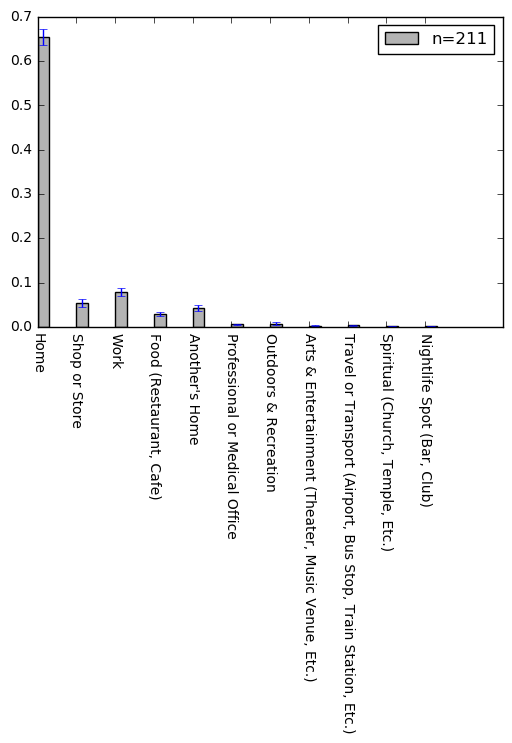

In [169]:
# all subjects

import matplotlib.pyplot as plt
%matplotlib inline

data_loc = data.loc[:,location_top]
mean = np.mean(data_loc, axis=0)
ci = np.std(data_loc, axis=0)/np.sqrt(data_loc.shape[0])

plt.bar(np.arange(mean.size), mean, yerr=ci, width=.3, color=(0.7,0.7,0.7))
plt.xticks(np.arange(mean.size), data_loc.columns, rotation=270)
plt.legend(['n={}'.format(data_loc.shape[0])])

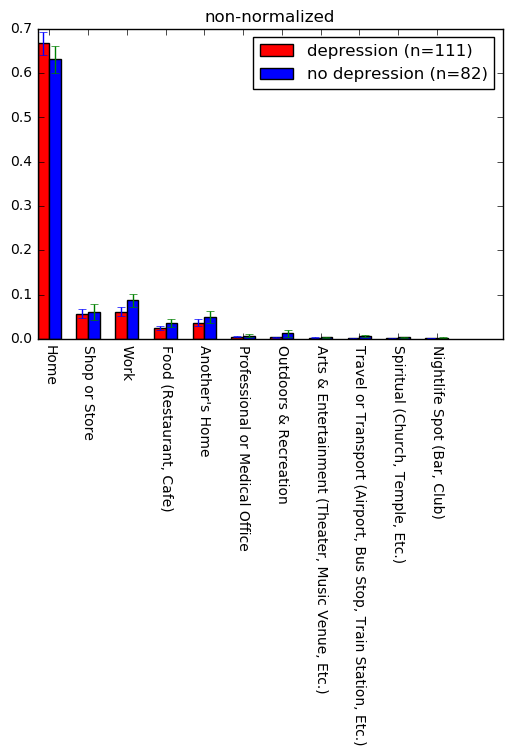

In [174]:
# compare depressed to non-depressed

import matplotlib.pyplot as plt
%matplotlib inline

# option 1: all <> 10
# ind_dep = np.where(np.logical_and(np.logical_and(data['PHQ9 W0']>=10, data['PHQ9 W3']>=10), data['PHQ9 W6']>=10))[0]
# ind_nodep = np.where(np.logical_and(np.logical_and(data['PHQ9 W0']<10, data['PHQ9 W3']<10), data['PHQ9 W6']<10))[0]

# option 2: average <> 10
ind_dep = np.where(data['PHQ9 W0']+data['PHQ9 W3']+data['PHQ9 W6']>=30)[0]
ind_nodep = np.where(data['PHQ9 W0']+data['PHQ9 W3']+data['PHQ9 W6']<30)[0]


data_dep = data.loc[ind_dep, list(location_top)]
data_nodep = data.loc[ind_nodep, list(location_top)]

mean_dep = np.mean(data_dep, axis=0)
mean_nodep = np.mean(data_nodep, axis=0)
ci_dep = np.std(data_dep, axis=0)/np.sqrt(data_dep.shape[0])
ci_nodep = np.std(data_nodep, axis=0)/np.sqrt(data_nodep.shape[0])

plt.bar(np.arange(mean_dep.size), mean_dep, yerr=ci_dep, width=.3, color=(1,0,0))
plt.bar(np.arange(mean_nodep.size)+.3, mean_nodep, yerr=ci_nodep, width=.3, color=(0,0,1))
plt.xticks(np.arange(mean_dep.size)+.3, data_dep.columns, rotation=270)
plt.legend(['depression (n={})'.format(data_dep.shape[0]),'no depression (n={})'.format(data_nodep.shape[0])])
plt.title('non-normalized')

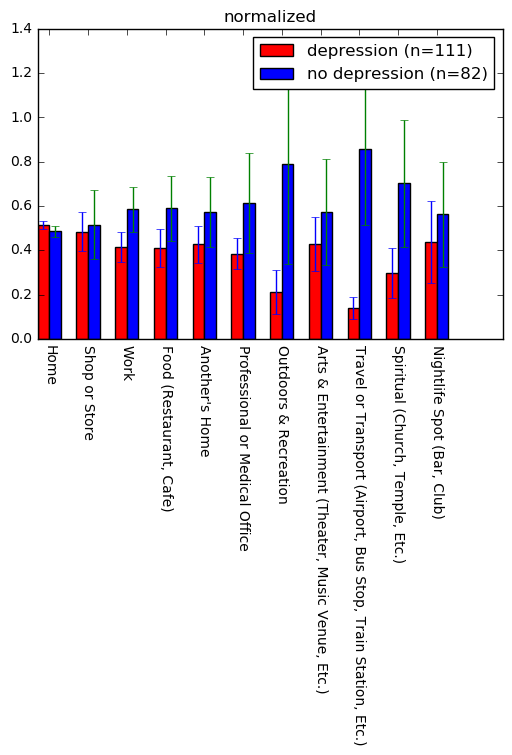

In [175]:
# same plot, normalized

plt.bar(np.arange(mean_dep.size), np.divide(mean_dep,mean_dep+mean_nodep), yerr=np.divide(ci_dep,mean_dep+mean_nodep), width=.3, color=(1,0,0))
plt.bar(np.arange(mean_nodep.size)+.3, np.divide(mean_nodep,mean_dep+mean_nodep), yerr=np.divide(ci_nodep,mean_dep+mean_nodep), width=.3, color=(0,0,1))
plt.xticks(np.arange(mean_dep.size)+.3, data_dep.columns, rotation=270)
plt.legend(['depression (n={})'.format(data_dep.shape[0]),'no depression (n={})'.format(data_nodep.shape[0])])
plt.title('normalized')

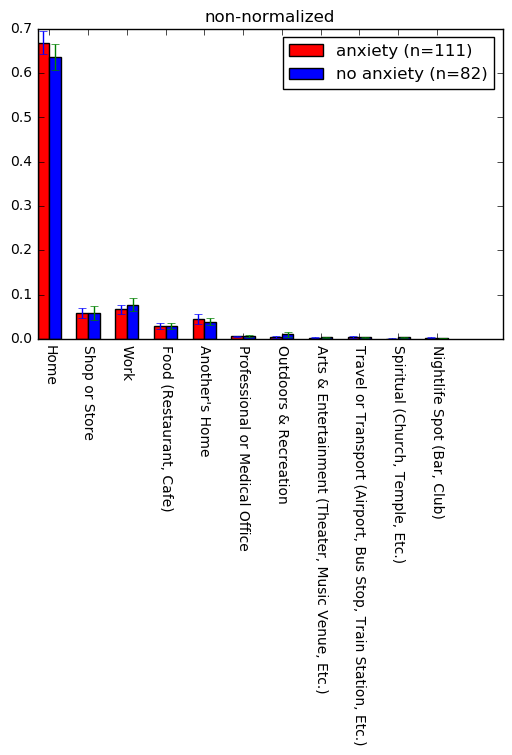

In [176]:
# compare anxious to non-anxious

import matplotlib.pyplot as plt
%matplotlib inline

# option 1: all <> 10
# ind_anx = np.where(np.logical_and(np.logical_and(data['GAD7 W0']>=10, data['GAD7 W3']>=10), data['GAD7 W6']>=10))[0]
# ind_noanx = np.where(np.logical_and(np.logical_and(data['GAD7 W0']<10, data['GAD7 W3']<10), data['GAD7 W6']<10))[0]

# option 2: average <> 10
ind_anx = np.where(data['GAD7 W0']+data['GAD7 W3']+data['GAD7 W6']>=30)[0]
ind_noanx = np.where(data['GAD7 W0']+data['GAD7 W3']+data['GAD7 W6']<30)[0]

data_anx = data.loc[ind_anx, list(location_top)]
data_noanx = data.loc[ind_noanx, list(location_top)]

mean_anx = np.mean(data_anx, axis=0)
mean_noanx = np.mean(data_noanx, axis=0)
ci_anx = np.std(data_anx, axis=0)/np.sqrt(data_anx.shape[0])
ci_noanx = np.std(data_noanx, axis=0)/np.sqrt(data_noanx.shape[0])

plt.bar(np.arange(mean_anx.size), mean_anx, yerr=ci_anx, width=.3, color=(1,0,0))
plt.bar(np.arange(mean_noanx.size)+.3, mean_noanx, yerr=ci_noanx, width=.3, color=(0,0,1))
plt.xticks(np.arange(mean_anx.size)+.3, data_anx.columns, rotation=270)
plt.legend(['anxiety (n={})'.format(data_dep.shape[0]),'no anxiety (n={})'.format(data_nodep.shape[0])])
plt.title('non-normalized')

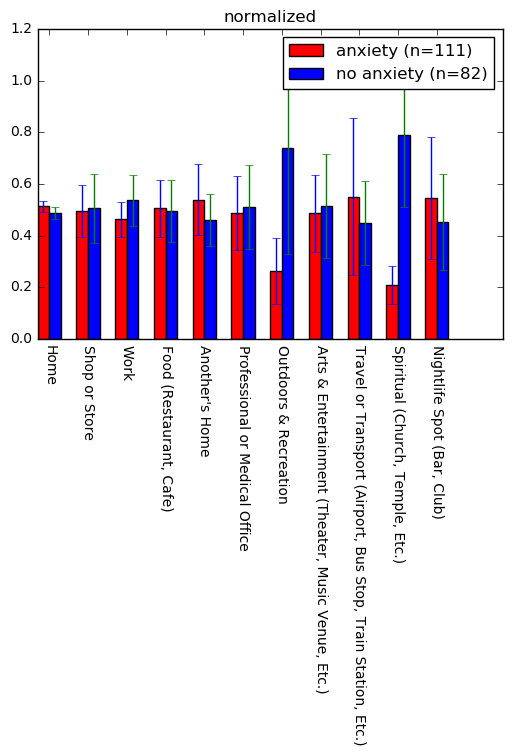

In [177]:
# same but normalized

plt.bar(np.arange(mean_anx.size), np.divide(mean_anx,mean_anx+mean_noanx), yerr=np.divide(ci_anx,mean_anx+mean_noanx), width=.3, color=(1,0,0))
plt.bar(np.arange(mean_noanx.size)+.3, np.divide(mean_noanx,mean_anx+mean_noanx), yerr=np.divide(ci_noanx,mean_anx+mean_noanx), width=.3, color=(0,0,1))
plt.xticks(np.arange(mean_anx.size)+.3, data_anx.columns, rotation=270)
plt.legend(['anxiety (n={})'.format(data_dep.shape[0]),'no anxiety (n={})'.format(data_nodep.shape[0])])
plt.title('normalized')

In [138]:
data['GAD7 W0']+data['GAD7 W3']

0       15
1       27
2       26
3        1
4       14
5        8
6        2
7       28
8       13
9       26
10      34
11      22
12       8
13      24
14       6
15      19
16      12
17      19
18      22
19      10
20       0
21      14
22      23
23      27
24      12
25      14
26      36
27      21
28      25
29       5
      ... 
181     22
182     28
183     10
184     37
185     30
186      0
187     36
188     19
189     18
190      7
191     22
192     25
193    NaN
194    NaN
195     17
196     14
197    NaN
198    NaN
199    NaN
200    NaN
201    NaN
202    NaN
203    NaN
204    NaN
205    NaN
206    NaN
207    NaN
208    NaN
209    NaN
210    NaN
dtype: object

In [153]:
np.divide(mean_dep,mean_dep+mean_nodep)

Home                                                            0.512036
Shop or Store                                                   0.545584
Work                                                            0.382718
Food (Restaurant, Cafe)                                         0.422109
Another's Home                                                  0.557149
Professional or Medical Office                                  0.756475
Outdoors & Recreation                                           0.523514
Arts & Entertainment (Theater, Music Venue, Etc.)               0.319046
Travel or Transport (Airport, Bus Stop, Train Station, Etc.)    0.122752
Spiritual (Church, Temple, Etc.)                                0.297125
Nightlife Spot (Bar, Club)                                      0.481061
dtype: float64